In [1]:
import matplotlib.pyplot as plt
import re

In [2]:
datasets = ["stl", "cifar10"]
file_directory = "../../logs/resnet18/"

In [3]:
def extract_floats(s):
    # Regular expression for matching floats
    pattern = r"[-+]?[0-9]*\.?[0-9]+"
    # Find all matches in the string
    matches = re.findall(pattern, s)
    # Convert all matches to float
    floats = [float(match) for match in matches]
    return floats

In [4]:
import numpy as np

def read_file(file_path, results):
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            if "Data ratio" in line:
                # Get the value after ":"
                line = line.split(":")[2].strip()
                data_ratio = extract_floats(line.split(",")[0].strip())[0]
                data_volume = extract_floats(line.split(",")[1].strip())[0]
                accuracy = extract_floats(line.split(",")[3].strip())[0]
                if data_volume not in results:
                    results[data_volume] = [accuracy]
                else:
                    results[data_volume].append(accuracy)
        return results

In [5]:
source = 'cifar10'
target = 'stl'
seeds = [1, 2, 3, 4, 5]
sparsity = 0.95
epochs = [1, 2, 5, 10, 20]
results = {}
for epoch in epochs:
    results[epoch] = {}
for seed in seeds:
    for epoch in epochs:
        org_path = file_directory + f"lda/{seed}/{sparsity}/{epoch}/admm_" + source + "_to_" + target + ".log"
        results[epoch]= read_file(org_path, results[epoch])


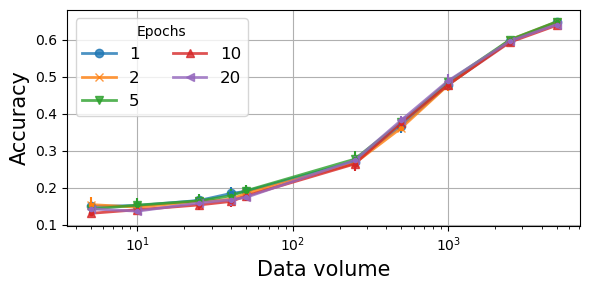

In [6]:
plt.figure(figsize=(6, 3))
# Create a color map once, to be used for all the lines
cmap = plt.get_cmap('tab10')
markers = ['o', 'x', 'v', '^', '<', '>', 'h', 'H', 'D', 'P', '*', '+', '|', '_']
# Plot all the sparsity results
for i, s in enumerate(results.keys()):
    dic = results[s]
    std = np.std(list(dic.values()), axis=1)
    mean = np.mean(list(dic.values()), axis=1)
    label = f"{s}"  # Shorten label here if necessary
    plt.plot(list(dic.keys()), mean, label=label, color=cmap(i), marker=markers[i], linewidth=2, alpha=0.8)
    plt.errorbar(list(dic.keys()), mean, yerr=std, fmt='.', color=cmap(i), alpha=1)


plt.grid()
plt.legend(title='Epochs', ncols=2, fontsize=12)
# Apply log scale for x-axis
plt.xscale('log')
plt.xlabel('Data volume', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

plt.tight_layout()
plt.savefig("../../imgs/epoch.pdf")